<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 5, Due: Tuesday October 24th, 1:30pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

## Questions 

### From the extra notebook:


Can you frame the face with a black locket? 

<img src="racoon_masked.png">

That is identify the corresponding units of the matrix that you want to be black (se them equal to zero). The center of the face is around (660, 330), so you need to define a mask by this condition $(y-300)^2 + (x-660)^2$. Look up np.ogrid to creat column and row matrixes out of the arrays. Indeed, you do need a matrix! :)

I did not really get `np.ogrid`, so I went with loops.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

face = misc.face(gray=True)
F = np.matrix(face)
F.shape

(768, 1024)

In [3]:
for i in range(0,768): 
    for j in range(0,1024):
        if np.sqrt(np.square(i - 330) + np.square(j - 660)) > 370: 
            F[i,j] = 0 

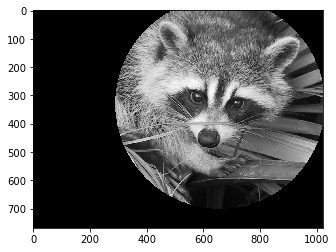

In [4]:
plt.imshow(F, cmap=plt.cm.gray)   
plt.show()

### Class 8:

1) Choose a wikipedia page. For each neighbor of the page, get all of its links, keeping only those present in the list of neighbors of the ego. Add each link as a directed edge to your graph.

2) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis. 

3) Plot the distributions of out-degree and in-degree for your network on the same plot, on a log-log scale.

4) Create a BA graph of 100 nodes and with $m=3$ using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute. 

In [2]:
import networkx as nx
import re
import urllib.request

1) Choose a wikipedia page. For each neighbor of the page, get all of its links, keeping only those present in the list of neighbors of the ego. Add each link as a directed edge to your graph.

In [3]:
def get_links(url):
    '''pass a url and return a list of wikipedia links'''
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    base=result.read()
    base=str(base)
    splitting=base.split('<a href=') 
    links=[]
    for nn in splitting:
        #use a regular expression to pick out the wikipedia internal links
        link=[x for x in re.findall('"([^"]*)"',nn) if x[0:5]=='/wiki']
        if len(link)>0:
            #links containing : are general wikipedia pages that we want to skip
            if ':' in link[0]:
                pass
            else:
                links.append('https://en.wikipedia.org'+link[0])
    #take the set to remove duplicates
    return list(set(links))

In [6]:
base_page = 'https://en.wikipedia.org/wiki/Niki_Lauda'
first_neighbors = get_links(base_page)
D=nx.DiGraph()
for page in first_neighbors:
    D.add_edge(base_page,page)

In [7]:
for child_page in first_neighbors:
    child_first_neighbors = get_links(child_page)
    for element in child_first_neighbors:
        if element in first_neighbors:
            D.add_edge(child_page, element)

2) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis.

In [25]:
D_indegrees=D.in_degree
PG = nx.pagerank(D)

In [35]:
i_d = D.in_degree()
type(i_d)

dict

In [37]:
indigriz = []
pedzs = []
for key in i_d:
    indigriz.append(i_d[key])
for key in PG:
    pedzs.append(PG[key])

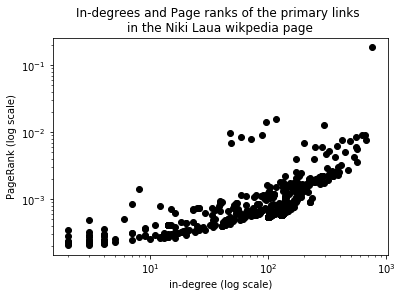

In [74]:
plt.plot(indigriz, pedzs, "ko")
plt.xlabel("in-degree (log scale)")
plt.ylabel("PageRank (log scale)")
plt.title("In-degrees and Page ranks of the primary links \nin the Niki Laua wikpedia page")
plt.xscale("log")
plt.yscale("log")
plt.show()

3) Plot the distributions of out-degree and in-degree for your network on the same plot, on a log-log scale.

In [41]:
o_d = D.out_degree()
outdigriz = []
for key in o_d:
    outdigriz.append(o_d[key])

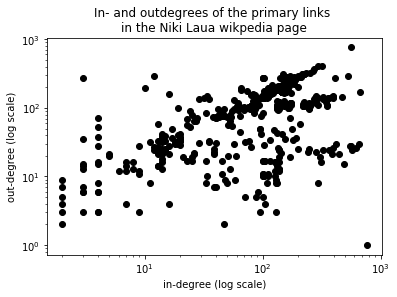

In [75]:
plt.plot(indigriz, outdigriz, "ko")
#axes = plt.gca()
plt.xlabel("in-degree (log scale)")
plt.ylabel("out-degree (log scale)")
plt.title("In- and outdegrees of the primary links \nin the Niki Laua wikpedia page")
plt.xscale("log")
plt.yscale("log")
#axes.set_ylim([0,0.02])
plt.show()

4) Create a BA graph of 100 nodes and with $m=3$ using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute. 

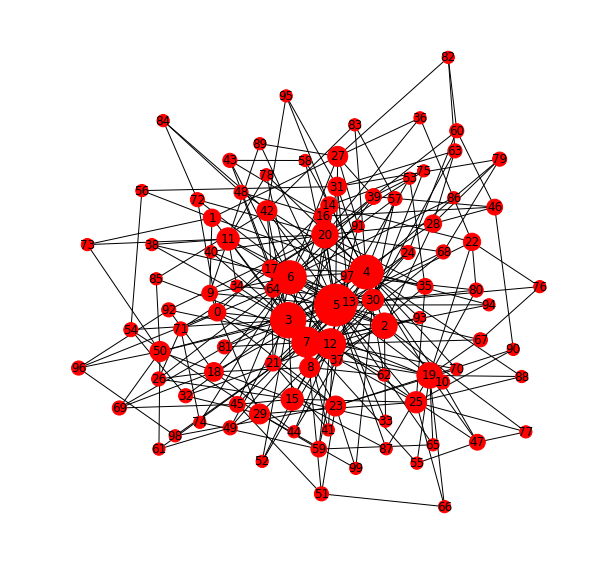

In [72]:
nodes = 100
m = 3
seed = 50
BA1 = nx.barabasi_albert_graph(nodes, m, seed)
degree = nx.degree(BA1)
fig=plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx(BA1, node_size=[d * 50 for d in degree.values()])

[]

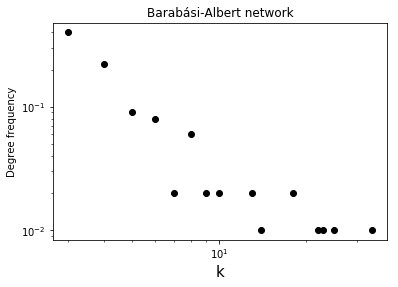

In [82]:
BA_degrees=nx.degree(BA1)
BA_degrees=np.array(list(BA_degrees.values()))
BA_hist, bin_edges= np.histogram(BA_degrees, bins=max(BA_degrees)-min(BA_degrees), density=True)
plt.plot(bin_edges[:-1],BA_hist,'ko')
plt.xlabel('k', fontsize=15)
plt.ylabel('Degree frequency')
plt.title("Barabási-Albert network")
plt.loglog()